<a href="https://colab.research.google.com/github/jh-4166640/Machine-Learning-Lecture/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((len(train_images),784))
test_images = test_images.reshape((len(test_images),784))

In [57]:
encoding_dim = 2 # 차원이 커지면 압축 효과는 줄어듬
# 즉 원본과 거의 유사함
encoder = keras.models.Sequential([
    keras.layers.Dense(encoding_dim, activation='relu',input_shape = (784,))
])
decoder = keras.models.Sequential([
    keras.layers.Dense(784, activation='relu',input_shape = (encoding_dim,))
])

AE = keras.models.Sequential([encoder, decoder])
AE.compile(optimizer='adam', loss='mse')

In [58]:
history = AE.fit(train_images, train_images, epochs=50, batch_size = 256, shuffle=True)

decoded_img = AE.predict(test_images)



Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0843
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0697
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0679
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0675
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0675
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0671
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0669
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0666
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0666
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0664
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0664
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0664
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0662
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0664
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

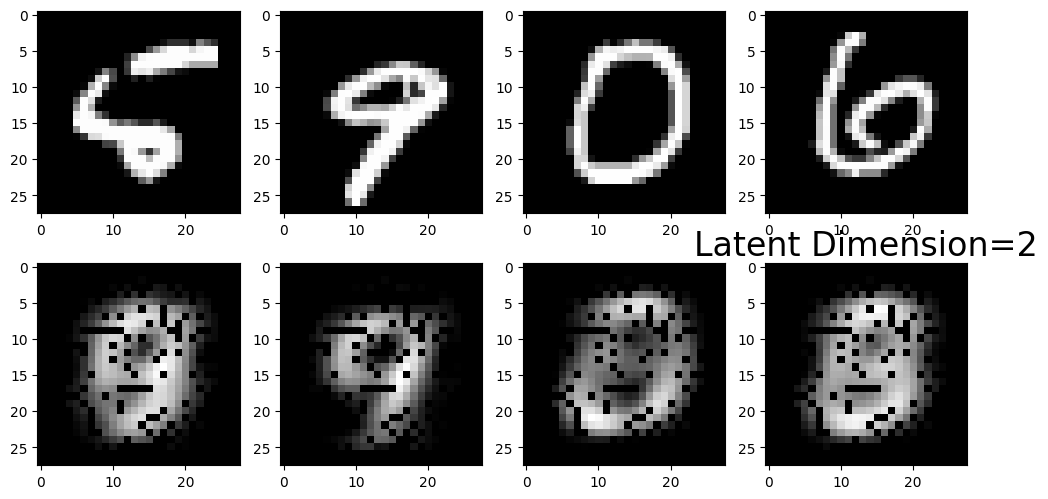

In [59]:
n = 4
plt.figure(figsize=(12,6))
for i in range(8,n+8):
  ax = plt.subplot(2,n,i-7)
  plt.imshow(test_images[i].reshape(28,28), cmap='gray')

  ax = plt.subplot(2,n,i+n-7)
  plt.imshow(decoded_img[i].reshape(28,28), cmap='gray')

plt.title("Latent Dimension="+str(encoding_dim), fontsize = 24)
plt.show()

------
### Noise 제거

In [60]:
import numpy as np
noise_factor = 0.9

origin_train = train_images
origin_test = test_images
noise_train = np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
noise_test = np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
noisy_train = origin_train + noise_factor * noise_train
noisy_test = origin_test + noise_factor * noise_test


In [72]:
encoding_dim = 128 # 노이즈 제거는 오히려 차원 축소를 덜 해야함
# 즉 encoding_dim이 커야 원본 이미지와 비슷하게 나옴
encoder = keras.models.Sequential([
    keras.layers.Dense(encoding_dim, activation='relu',input_shape = (784,))
])
decoder = keras.models.Sequential([
    keras.layers.Dense(784, activation='relu',input_shape = (encoding_dim,))
])

AE = keras.models.Sequential([encoder, decoder])
AE.compile(optimizer='adam', loss='mse')

In [73]:
history = AE.fit(noisy_train, train_images,
                 epochs=50, batch_size=256, shuffle=True,
                 validation_data=(noisy_test, test_images))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0763 - val_loss: 0.0373
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0357 - val_loss: 0.0326
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0321 - val_loss: 0.0314
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0308 - val_loss: 0.0308
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0299 - val_loss: 0.0303
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0292 - val_loss: 0.0297
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0287 - val_loss: 0.0295
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0282 - val_loss: 0.0294
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0279 - val_loss: 0.0293
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0276 - val_loss: 0.0292
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0275 - val_loss: 0.0291
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


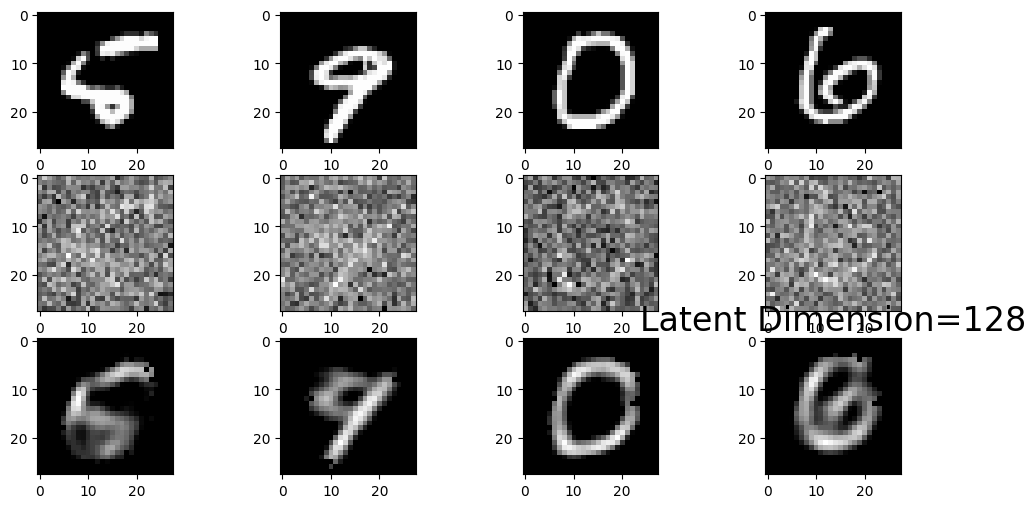

In [74]:
decoded_img = AE.predict(noisy_test)

n = 4
plt.figure(figsize=(12,6))
for i in range(8,n+8):
  ax = plt.subplot(3,n,i-7)
  plt.imshow(origin_test[i].reshape(28,28), cmap='gray')

  ax = plt.subplot(3,n,i+n-7)
  plt.imshow(noisy_test[i].reshape(28,28), cmap='gray')

  ax = plt.subplot(3,n,i+2*n-7)
  plt.imshow(decoded_img[i].reshape(28,28), cmap='gray')
plt.title("Latent Dimension="+str(encoding_dim), fontsize = 24)
plt.show()


------
## Variational Auto-Encoder 실습

In [75]:
#sampling Layer 생성
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

class Sampling(layers.Layer):
  def call(self, inputs):
    z_mean, z_log_var = inputs
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5*z_log_var) * epsilon

In [76]:
latent_dim = 2 # latent 차원
encoder_inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
# (28,28,1) -> Conv2D에 strides=2 통과하면 -> (14,14,32)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
# (14,14,32) -> Conv2D에 strides=2 통과하면 -> (7,7,64)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean,z_log_var])
# z=μ+σ⋅ϵ
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 14, 14,    │        320 │ input_layer_41[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 3136)      │          0 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 16)        │     50,192 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 32)        │        544 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 32)        │        544 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_3          │ (None, 32)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,096 (273.81 KB)

 Trainable params: 70,096 (273.81 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from threading import active_count
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
# 마지막 Conv가 (7, 7, 64)이므로
x = layers.Reshape((7,7,64))(x)
x = layers.Conv2DTranspose(64,3,activation="relu",strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32,3,activation="relu",strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1,3,activation="sigmoid",padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3136)           │       103,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,169 (621.75 KB)

 Trainable params: 159,169 (621.75 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
class VAE(keras.Model):
  def __init__(self, encoder, decoder, **kwargs):
    super().__init__(**kwargs)
    self.encoder = encoder
    self.decoder = decoder
    self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
    self.reconstruction_loss_tracker = keras.metrics.Mean(
        name = "reconstruction_loss"
    )
    self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
  @property
  def metrics(self):
    return [
        self.total_loss_tracker,
        self.reconstruction_loss_tracker,
        self.kl_loss_tracker,
    ]
  def train_step(self,data):
    with tf.GradientTape() as tape:
      z_mean, z_log_var, z = self.encoder(data)
      reconstruction = self.decoder(z)
      reconstruction_loss = tf.reduce_mean(
          tf.reduce_sum(
              keras.losses.binary_crossentropy(data, reconstruction), axis=(1,2)
          )
      )
      kl_loss = -0.5*(1+z_log_var-tf.square(z_mean)-tf.exp(z_log_var))
      kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
      total_loss = reconstruction_loss + kl_loss
    grads = tape.gradient(total_loss,self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    self.total_loss_tracker.update_state(total_loss)
    self.reconstruction_loss_tracker.update_state(reconstruction_loss)
    self.kl_loss_tracker.update_state(kl_loss)
    return {
        "loss": self.total_loss_tracker.result(),
        "reconstruction_loss": self.reconstruction_loss_tracker.result(),
        "kl_loss": self.kl_loss_tracker.result(),
    }


In [80]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)


Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - kl_loss: 5.3513 - loss: 247.0981 - reconstruction_loss: 241.7468
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 9.8181 - loss: 170.3648 - reconstruction_loss: 160.5467
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 9.0904 - loss: 157.5860 - reconstruction_loss: 148.4957
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 8.4831 - loss: 151.5125 - reconstruction_loss: 143.0294
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 8.2674 - loss: 148.4495 - reconstruction_loss: 140.1821
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 8.2288 - loss: 145.9773 - reconstruction_loss: 137.7485
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 8.2445 - loss: 144.7902 - reconstruction_loss: 136.5456
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 8.2392 - loss: 143.8684 - reconstruction_loss: 135.6292
Epoch 9/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

In [81]:
def plot_latent_space(vae, n=30, figsize=15):
  digit_size = 28
  scale = 2.0
  figure = np.zeros((digit_size * n, digit_size * n))
  grid_x = np.linspace(-scale,scale,n)
  grid_y = np.linspace(-scale,scale,n)[::-1]
  for i, yi in enumerate(grid_y):
    for j,xi in enumerate(grid_x):
      z_sample = np.array([[xi,yi]])
      x_decoded = vae.decoder.predict(z_sample)
      digit = x_decoded[0].reshape(digit_size,digit_size)
      figure[
          i * digit_size : (i+1) * digit_size,
          j * digit_size : (j+1) * digit_size,
      ] = digit
  plt.figure(figsize=(figsize,figsize))
  start_range = digit_size // 2
  end_range = n * digit_size + start_range
  pixel_range = np.arange(start_range,end_range,digit_size)
  sample_range_x = np.round(grid_x,1)
  sample_range_y = np.round(grid_y,1)
  plt.xticks(pixel_range, sample_range_x)
  plt.yticks(pixel_range, sample_range_y)
  plt.xlabel("z[0]")
  plt.ylabel("z[1]")
  plt.imshow(figure, cmap="Greys_r")
  plt.show()
plot_latent_space(vae)

ValueError: Input 0 of layer "decoder" is incompatible with the layer: expected shape=(None, 32), found shape=(1, 2)

In [ ]:
def plot_label_clusters(vae,data,labels):
  z_mean, _, _ = vae.encoder.predict(data)
  plt.figure(figsize=(12,10))
  plt.scatter(z_mean[:,0], z_mean[:,1], c=labels)
  plt.colorbar()
  plt.xlabel("z[0]")
  plt.ylabel("z[1]")
  plt.show()
(x_train,y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32")/255
plot_label_clusters(vae,x_train,y_train)